<a href="https://colab.research.google.com/github/mahesh2301/MaheshSharma/blob/main/Restaurant%20Revenue%20%26%20House%20Pricing%20Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Restaurant Revenue Prediction

## Linear Regression Assignment-1



**Libraries that are used for Linear Regression Assignment**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Load the dataset using the pandas
 

In [ ]:
train_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SSSIHL ADS/restaurant-revenue-prediction/train.csv/train.csv')
test_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SSSIHL ADS/restaurant-revenue-prediction/test.csv/test.csv')

## Data fields
1. **Id** : Restaurant id. 
2.**Open Date**: opening date for a restaurant
3. **City** : City that the restaurant is in. Note that there are unicode in the names. 
4. **City Group**: Type of the city. Big cities, or Other. 
5. Type: Type of the restaurant. FC: Food Court, IL: Inline, DT: Drive Thru, MB: Mobile
6. **P1, P2 - P37**: There are three categories of these obfuscated data. Demographic data are gathered from third party providers with GIS systems. These include population in any given area, age and gender distribution, development scales. Real estate data mainly relate to the m2 of the location, front facade of the location, car park availability. Commercial data mainly include the existence of points of interest including schools, banks, other QSR operators.
7. **Revenue**: The revenue column indicates a (transformed) revenue of the restaurant in a given year and is the target of predictive analysis. Please note that the values are transformed so they don't mean real dollar values. 

In [ ]:
train_data.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [ ]:
train_data.head() # displaying the columns of data 

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [ ]:
test_data.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0


In [ ]:
train_data['Open Date'] = pd.to_datetime(train_data['Open Date'],format='%m/%d/%Y')
train_data['OpenDays']=''

dateLastT=pd.DataFrame({'Date':np.repeat(['01/01/2018'],[len(train_data)])})
dateLastT['Date']=pd.to_datetime(dateLastT['Date'],format='%m/%d/%Y')
dateLastT
train_data['OpenDays']=dateLastT['Date']-train_data['Open Date']
train_data['OpenDays']=train_data['OpenDays'].astype('timedelta64[D]').astype(int)

In [ ]:
train_data.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,OpenDays
0,0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,5,3,4,5,5,4,3,4,5653753.0,6743
1,1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,0,0,0,0,0,0,0,0,6923131.0,3609
2,2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,0,0,0,0,0,0,0,0,2055379.0,1759
3,3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,25,12,10,6,18,12,12,6,2675511.0,2160
4,4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,5,1,3,2,3,4,3,3,4316715.0,3159


In [ ]:
numcol=train_data.select_dtypes(exclude=['object']).columns
catcol=train_data.select_dtypes(include=['object']).columns

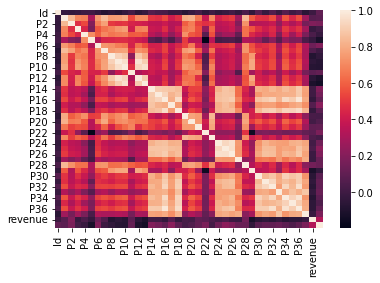

In [ ]:
corr=train_data[numcol].corr()
sns.heatmap(corr)

In [ ]:
corr['revenue'].sort_values(ascending=False)

revenue     1.000000
OpenDays    0.325821
P2          0.191518
P28         0.155534
P6          0.139094
P21         0.097411
P11         0.084247
P22         0.083562
P1          0.070217
P17         0.067137
P7          0.051165
P23         0.045507
P25         0.036365
P4          0.035685
P19         0.027984
P24         0.014222
P20         0.014147
P14         0.006441
P15         0.000742
Id         -0.006277
P26        -0.007650
P27        -0.013680
P37        -0.019051
P3         -0.024613
P5         -0.028191
P33        -0.032426
P18        -0.034537
P16        -0.037997
P31        -0.040418
P35        -0.050156
P9         -0.050352
P36        -0.050534
P12        -0.062193
P32        -0.065857
P30        -0.066203
P34        -0.072343
P10        -0.073220
P8         -0.084215
P13        -0.105085
P29        -0.114846
Name: revenue, dtype: float64

In [ ]:
train_data=train_data.drop('Open Date',axis=1)


In [ ]:
train_data=train_data.drop('Id',axis=1)

In [ ]:
train_data.head(5)

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,OpenDays
0,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,...,5,3,4,5,5,4,3,4,5653753.0,6743
1,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,...,0,0,0,0,0,0,0,0,6923131.0,3609
2,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,...,0,0,0,0,0,0,0,0,2055379.0,1759
3,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,...,25,12,10,6,18,12,12,6,2675511.0,2160
4,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,...,5,1,3,2,3,4,3,3,4316715.0,3159


In [ ]:
dummydata=pd.get_dummies(train_data['City Group'])
train_data=train_data.join(dummydata)
train_data=train_data.drop('City Group',axis=1)
train_data.head()

,City,Type,P1,P2,P3,P4,P5,P6,P7,P8,...,P32,P33,P34,P35,P36,P37,revenue,OpenDays,Big Cities,Other
0,İstanbul,IL,4,5.0,4.0,4.0,2,2,5,4,...,4,5,5,4,3,4,5653753.0,6743,1,0
1,Ankara,FC,4,5.0,4.0,4.0,1,2,5,5,...,0,0,0,0,0,0,6923131.0,3609,1,0
2,Diyarbakır,IL,2,4.0,2.0,5.0,2,3,5,5,...,0,0,0,0,0,0,2055379.0,1759,0,1
3,Tokat,IL,6,4.5,6.0,6.0,4,4,10,8,...,10,6,18,12,12,6,2675511.0,2160,0,1
4,Gaziantep,IL,3,4.0,3.0,4.0,2,2,5,5,...,3,2,3,4,3,3,4316715.0,3159,0,1


In [ ]:
test_data['Open Date'] = pd.to_datetime(test_data['Open Date'],format='%m/%d/%Y')
test_data['OpenDays']=''

dateLastT=pd.DataFrame({'Date':np.repeat(['01/01/2018'],[len(test_data)])})
dateLastT['Date']=pd.to_datetime(dateLastT['Date'],format='%m/%d/%Y')
dateLastT
test_data['OpenDays']=dateLastT['Date']-test_data['Open Date']
test_data['OpenDays']=test_data['OpenDays'].astype('timedelta64[D]').astype(int)

test_data=test_data.drop("Open Date",axis=1)
dummydata_t=pd.get_dummies(test_data['City Group'])
test_data=test_data.join(dummydata_t)
test_data=test_data.drop('City Group',axis=1)
test_data.head()

,Id,City,Type,P1,P2,P3,P4,P5,P6,P7,...,P31,P32,P33,P34,P35,P36,P37,OpenDays,Big Cities,Other
0,0,Niğde,FC,1,4.0,4.0,4.0,1,2,5,...,0,0,0,0,0,0,0,2536,0,1
1,1,Konya,IL,3,4.0,4.0,4.0,2,2,5,...,0,0,0,0,0,0,0,2481,0,1
2,2,Ankara,FC,3,4.0,4.0,4.0,2,2,5,...,0,0,0,0,0,0,0,1524,1,0
3,3,Kocaeli,IL,2,4.0,4.0,4.0,2,3,5,...,4,0,0,0,0,0,0,1701,0,1
4,4,Afyonkarahisar,FC,2,4.0,4.0,4.0,1,2,5,...,0,0,0,0,0,0,0,1615,0,1


In [ ]:
import numpy as np
a= train_data['OpenDays'].apply(np.log)

In [ ]:
a.head()

0    8.816260
1    8.191186
2    7.472501
3    7.677864
4    8.058011
Name: OpenDays, dtype: float64

In [ ]:
import numpy as np

x_train = pd. DataFrame({ 'OpenDays':train_data['OpenDays'].apply(np.log),'Big Cities':train_data['Big Cities'], 'Other':train_data['Other'], 
                         'Pl':train_data['P1'], 'P2':train_data['P2'], 'P4':train_data['P4'],'P6':train_data['P6'],'P5':train_data['P5'],
                         'P7':train_data['P7'], 'P11':train_data['P11'], 'P14':train_data['P14'], 
                         'P15':train_data['P15'], 'P17':train_data['P17'], 'P19':train_data['P19'], 
                         'P20':train_data['P20'], 'P21':train_data['P21'], 'P23':train_data['P23'], 
                         'P24' :train_data['P24'], 'P25':train_data['P25'], 'P28':train_data['P28']})
y_train= train_data['revenue'].apply(np.log)
x_test = pd. DataFrame({ 'OpenDays':test_data['OpenDays'].apply(np.log),'Big Cities':test_data['Big Cities'], 'Other':test_data['Other'], 
                         'Pl':test_data['P1'], 'P2':test_data['P2'], 'P4':test_data['P4'],'P6':test_data['P6'],'P5':test_data['P5'],
                         'P7':test_data['P7'], 'P11':test_data['P11'], 'P14':test_data['P14'], 
                         'P15':test_data['P15'], 'P17':test_data['P17'], 'P19':test_data['P19'], 
                         'P20':test_data['P20'], 'P21':test_data['P21'], 'P23':test_data['P23'], 
                         'P24' :test_data['P24'], 'P25':test_data['P25'], 'P28':test_data['P28']})




In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler(with_std=True,with_mean=True,copy=True)
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

## Linear Regression

In [ ]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
regr.fit(x_train,y_train)
pred=regr.predict(x_test)
pred
regr.score(x_train,y_train)

0.25299885361289143

In [ ]:
regr.score(x_train,y_train)

0.25299885361289143

## SGDRegressor


In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
reg = make_pipeline(SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(x_train,y_train)
print(reg.score(x_train,y_train))
pred=reg.predict(x_test)

pred

array([15.21965767, 14.9195322 , 15.01006198, ..., 15.15368868,
       15.14503045, 15.21865535])

In [ ]:
reg.score(x_train,y_train)

0.22615992847387278

##HubeRegressor

In [ ]:
 from sklearn.linear_model import HuberRegressor
 from sklearn.pipeline import make_pipeline
reg2 = make_pipeline(HuberRegressor(max_iter=10000, tol=1e-3))
reg2.fit(x_train,y_train)
print(reg2.score(x_train,y_train))

pred=reg2.predict(x_test)
pred

0.22943811175615547


array([15.23919847, 14.90281027, 14.99469825, ..., 15.35895953,
       15.37679707, 15.05265522])

In [ ]:
reg2.score(x_train,y_train)

0.22943811175615547

## RandomForestRegressor


In [ ]:
forest=RandomForestRegressor(n_estimators=100)
forest.fit(x_train,y_train)
pred=forest.predict(x_test)
pred=np.exp(pred)
score=forest.score(x_train,y_train)
print(score)
pred=forest.predict(x_test)
print(pred)
pred=np.exp(pred)

0.8847951164937662
[15.07150027 15.07602811 15.08085726 ... 14.91780835 14.96871803
 15.46784868]


In [ ]:
pred=forest.predict(x_test)
pred=np.exp(pred)
score=forest.score(x_train,y_train)
print(score)

0.8847951164937662


In [ ]:
pred=forest.predict(x_test)
pred=np.exp(pred)

In [ ]:
pred

array([3528972.19747013, 3399550.28910863, 3381148.11417785, ...,
       3306356.60599158, 3339566.64690653, 5463698.43528509])

# House Price Prediction

[Click Here For dataset import method from kaggle](https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/)

In [ ]:
! pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d "/competitions/"

Invalid dataset specification /competitions/


In [ ]:
! pip install opendatasets
# !pip install pandas
import opendatasets as od
import pandas
  
od.download(
    "https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Skipping, found downloaded files in "./house-prices-advanced-regression-techniques" (use force=True to force download)


In [ ]:
train_data=pd.read_csv("/content/house-prices-advanced-regression-techniques/train.csv")
test_data=pd.read_csv("/content/house-prices-advanced-regression-techniques/test.csv")

In [ ]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
a=set(train_data.columns)
b=set(test_data.columns)
a.difference(b)

{'SalePrice'}

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
a=pd.DataFrame(train_data.isnull().sum())
b=pd.DataFrame(test_data.isnull().sum())
a

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [ ]:
#train_data['LotFrontage']=train_data['LotFrontage'].fillna(train_data['LotFrontage'].mean())
train_data['BsmtCond']=train_data['BsmtCond'].fillna(train_data['BsmtCond'].mode()[0])
train_data['BsmtQual']=train_data['BsmtQual'].fillna(train_data['BsmtQual'].mode()[0])
train_data['FireplaceQu']=train_data['FireplaceQu'].fillna(train_data['FireplaceQu'].mode()[0])
train_data['GarageType']=train_data['GarageType'].fillna(train_data['GarageType'].mode()[0])
train_data['GarageFinish']=train_data['GarageFinish'].fillna(train_data['GarageFinish'].mode()[0])
train_data['GarageQual']=train_data['GarageQual'].fillna(train_data['GarageQual'].mode()[0])
train_data['GarageCond']=train_data['GarageCond'].fillna(train_data['GarageCond'].mode()[0])
train_data['BsmtFinType2']=train_data['BsmtFinType2'].fillna(train_data['BsmtFinType2'].mode()[0])
train_data['BsmtExposure']=train_data['BsmtExposure'].fillna(train_data['BsmtExposure'].mode()[0])
train_data['MasVnrType']=train_data['MasVnrType'].fillna(train_data['MasVnrType'].mode()[0])
train_data['MasVnrArea']=train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].mode()[0])
train_data['Electrical']=train_data['Electrical'].fillna(train_data['Electrical'].mode()[0])
train_data['BsmtFinType1']=train_data['BsmtFinType1'].fillna(train_data['BsmtFinType1'].mode()[0])
train_data.drop(['PoolQC','Fence','MiscFeature','GarageYrBlt','Alley','Id'],axis=1,inplace=True)

In [ ]:
test_data['LotFrontage']=test_data['LotFrontage'].fillna(test_data['LotFrontage'].mean())
test_data['BsmtCond']=test_data['BsmtCond'].fillna(test_data['BsmtCond'].mode()[0])
test_data['BsmtQual']=test_data['BsmtQual'].fillna(test_data['BsmtQual'].mode()[0])
test_data['FireplaceQu']=test_data['FireplaceQu'].fillna(test_data['FireplaceQu'].mode()[0])
test_data['GarageType']=test_data['GarageType'].fillna(test_data['GarageType'].mode()[0])
test_data['GarageFinish']=test_data['GarageFinish'].fillna(test_data['GarageFinish'].mode()[0])
test_data['GarageQual']=test_data['GarageQual'].fillna(test_data['GarageQual'].mode()[0])
test_data['GarageCond']=test_data['GarageCond'].fillna(test_data['GarageCond'].mode()[0])
test_data.drop(['PoolQC','Fence','MiscFeature','GarageYrBlt','Alley','Id'],axis=1,inplace=True)
test_data['BsmtFinType2']=test_data['BsmtFinType2'].fillna(test_data['BsmtFinType2'].mode()[0])
test_data['BsmtExposure']=test_data['BsmtExposure'].fillna(test_data['BsmtExposure'].mode()[0])
test_data['MasVnrType']=test_data['MasVnrType'].fillna(test_data['MasVnrType'].mode()[0])
test_data['MasVnrArea']=test_data['MasVnrArea'].fillna(test_data['MasVnrArea'].mode()[0])
test_data['Electrical']=test_data['Electrical'].fillna(test_data['Electrical'].mode()[0])
test_data['BsmtFinType1']=test_data['BsmtFinType1'].fillna(test_data['BsmtFinType1'].mode()[0])

In [ ]:
test_data['Exterior1st']=test_data['Exterior1st'].fillna(test_data['Exterior1st'].mode()[0])
test_data['Exterior2nd']=test_data['Exterior2nd'].fillna(test_data['Exterior2nd'].mode()[0])
test_data['BsmtFinSF1']=test_data['BsmtFinSF1'].fillna(test_data['BsmtFinSF1'].mean())
test_data['BsmtFinSF2']=test_data['BsmtFinSF2'].fillna(test_data['BsmtFinSF1'].mean())
test_data['BsmtUnfSF']=test_data['BsmtUnfSF'].fillna(test_data['BsmtUnfSF'].mean())
test_data['TotalBsmtSF']=test_data['TotalBsmtSF'].fillna(test_data['TotalBsmtSF'].mean())
test_data['KitchenQual']=test_data['KitchenQual'].fillna(test_data['KitchenQual'].mode()[0])
test_data['GarageCars']=test_data['GarageCars'].fillna(test_data['GarageCars'].mean())
test_data['GarageArea']=test_data['GarageArea'].fillna(test_data['GarageArea'].mean())
test_data['SaleType']=test_data['SaleType'].fillna(test_data['SaleType'].mode()[0])
test_data['Utilities']=test_data['Utilities'].fillna(test_data['Utilities'].mode()[0])
test_data['BsmtFullBath']=test_data['BsmtFullBath'].fillna(test_data['BsmtFullBath'].mean())
test_data['BsmtHalfBath']=test_data['BsmtHalfBath'].fillna(test_data['BsmtHalfBath'].mean())
test_data['Functional']=test_data['Functional'].fillna(test_data['Functional'].mode()[0])
test_data['MSZoning']=test_data['MSZoning'].fillna(test_data['MSZoning'].mode()[0])


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1459 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [ ]:
final_df=pd.concat([train_data,test_data],axis=0)

In [ ]:
numcol=train_data.select_dtypes(exclude=['object']).columns
catcol=train_data.select_dtypes(include=['object']).columns

In [ ]:
list(numcol)

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

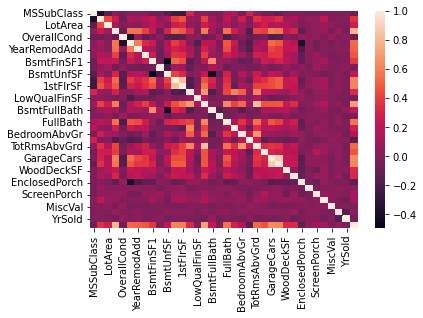

In [ ]:
corr=train_data[numcol].corr()
sns.heatmap(corr)

In [ ]:
corr['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [ ]:
columns=catcol

In [ ]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [ ]:
final_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [ ]:
final_df.shape

(2919, 236)

In [ ]:
final_df=final_df.loc[:,~final_df.columns.duplicated()]

In [ ]:
train_f=final_df.iloc[:1460,:]
test_f=final_df.iloc[1460:,:]

In [ ]:
train_f.dropna(inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
final_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
train_f.shape

(1201, 176)

In [ ]:
test_f.shape

(1459, 176)

In [ ]:
X_train=train_f.drop(['SalePrice','BsmtFinSF2','BsmtHalfBath','MiscVal','LowQualFinSF','YrSold','OverallCond','MSSubClass','EnclosedPorch','KitchenAbvGr'],axis=1)
y_train=train_f['SalePrice']
X_test=test_f.drop(['SalePrice','BsmtFinSF2','BsmtHalfBath','MiscVal','LowQualFinSF','YrSold','OverallCond','MSSubClass','EnclosedPorch','KitchenAbvGr'],axis=1)

In [ ]:
X_train.shape

(1201, 166)

In [ ]:
y_train.shape

(1201,)

In [ ]:
X_train.isnull().sum()

LotFrontage     0
LotArea         0
OverallQual     0
YearBuilt       0
YearRemodAdd    0
               ..
AdjLand         0
Alloca          0
Family          0
Normal          0
Partial         0
Length: 166, dtype: int64

## Linear Regression


In [ ]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
regr.fit(X_train,y_train)
pred=regr.predict(X_test)
pred


array([115304.81789309, 168350.70370097, 185736.01715045, ...,
       175509.56884857, 107528.97581029, 238496.82193366])

In [ ]:
regr.score(X_train,y_train)

0.9130674495223426

## Random Forest

In [ ]:
forest=RandomForestRegressor(n_estimators=50)
forest.fit(X_train,y_train)
pred=forest.predict(X_test)
#pred=np.exp(pred)
score=forest.score(X_train,y_train)
print(score)
pred=forest.predict(X_test)
print(pred)


0.9806266657676066
[123663.66 152794.   179913.58 ... 160454.66 120495.16 239146.78]


## HubeRegressor

In [ ]:
 from sklearn.linear_model import HuberRegressor
 from sklearn.pipeline import make_pipeline
reg2 = make_pipeline(HuberRegressor(max_iter=100000, tol=1e-4))
reg2.fit(X_train,y_train)
print(reg2.score(X_train,y_train))

pred=reg2.predict(X_test)
pred

0.8306877968806615


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


array([115482.90753471, 177104.80580713, 194131.78706234, ...,
       186561.84747432, 108151.22432229, 226241.33202404])